# Plots

In [1]:
import sys
sys.path.append('/home/hamid/ensemble_tool/EnsembleTools/')

## Download from Atlas and Load

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.featurization.distances import (featurize_com_dist, calc_ca_dmap, calc_ca_dmap)
from dpet.visualization import *

ens_codes = [
    'PED00156e001',

   
]
data_dir = '/home/hamid/PED_Data_analysis/nikola'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='ped')
analysis.generate_trajectories()

/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/neo_force_scheme/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Trajectory already exists for ensemble PED00156e001. Loading trajectory.


In [3]:
vis = Visualization(analysis=analysis)

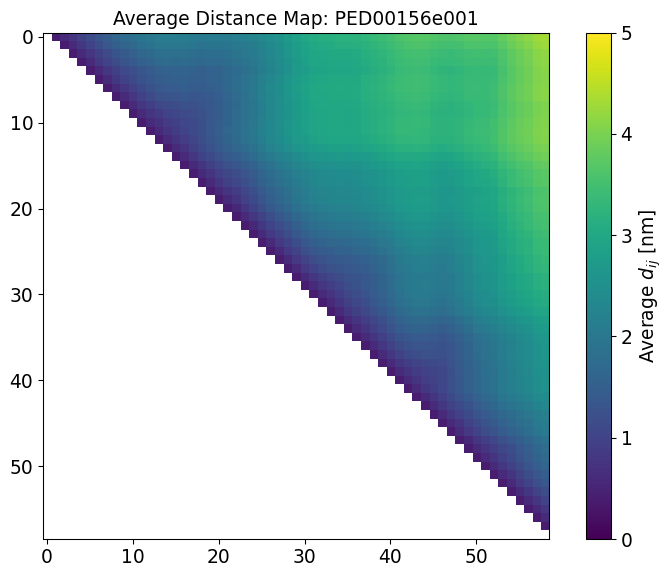

In [10]:
vis.average_dmap_comparison()

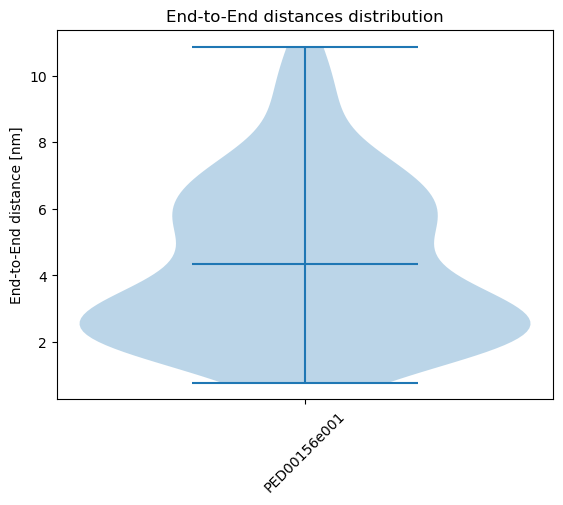

In [25]:
vis.end_to_end_dist(bins=50, violin_plot=True, median=False, means=True)

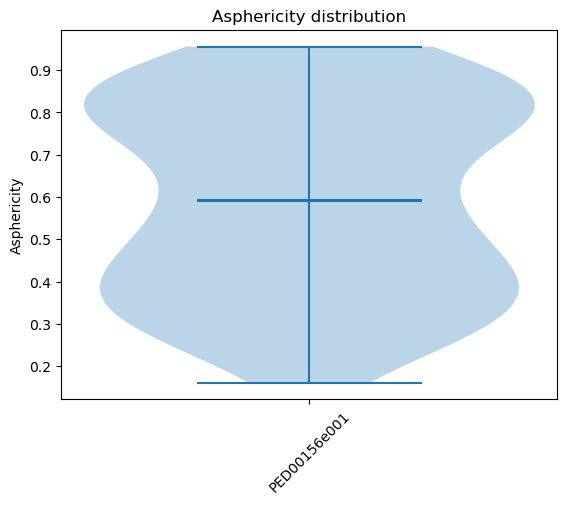

In [13]:
vis.asphericity_dist(bins=10, violin_plot=True)

Pearson coeff for PED00156e001 = 0.892


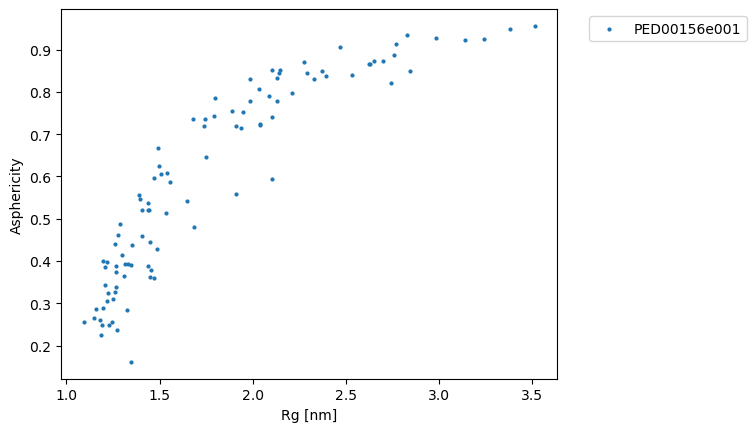

In [14]:
vis.rg_vs_asphericity()

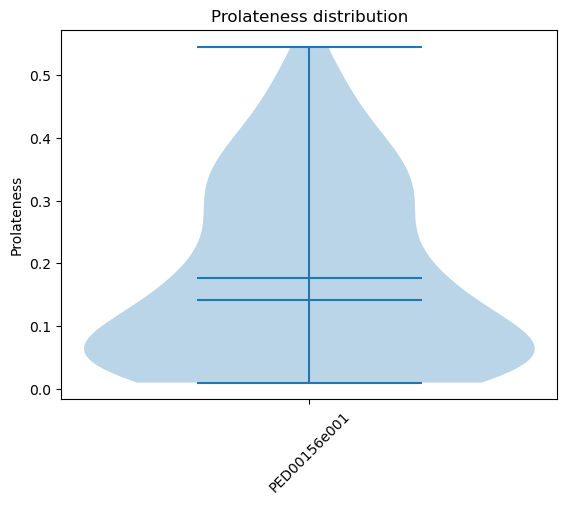

In [16]:
vis.prolateness_dist(bins=10, violin_plot=True, median=True, mean=True)

Pearson coeff for PED00156e001 = -0.624


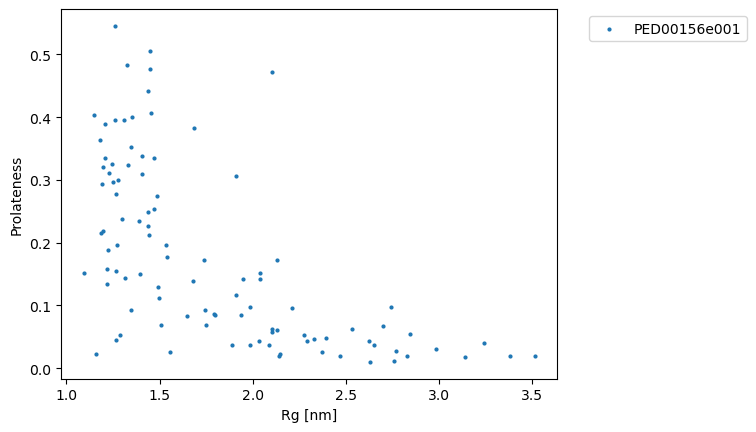

In [17]:
vis.rg_vs_prolateness()

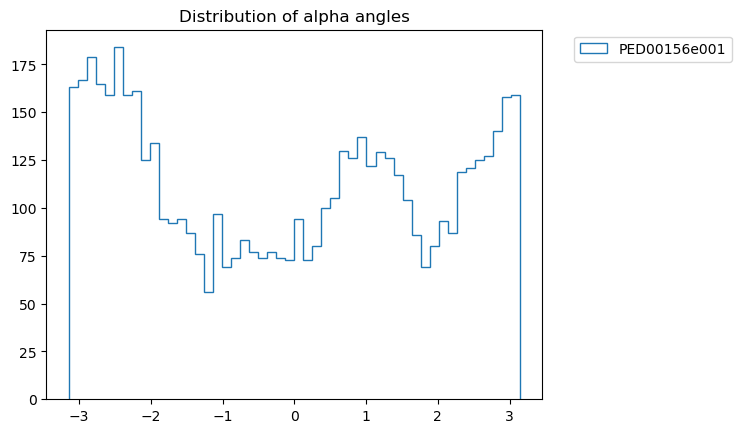

In [18]:
vis.alpha_angles_dist()

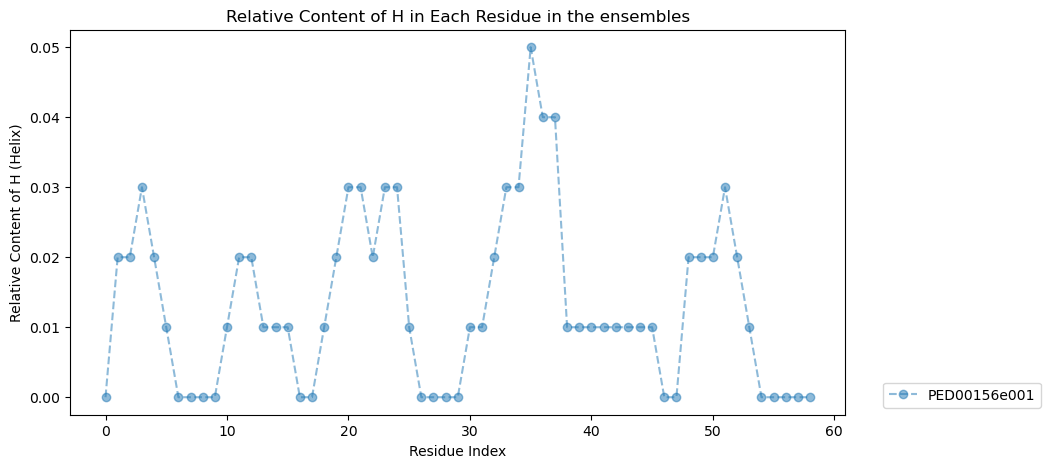

In [19]:
vis.relative_helix_content()

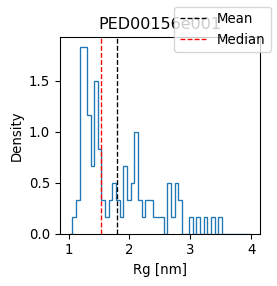

In [6]:
vis.rg_comparison()

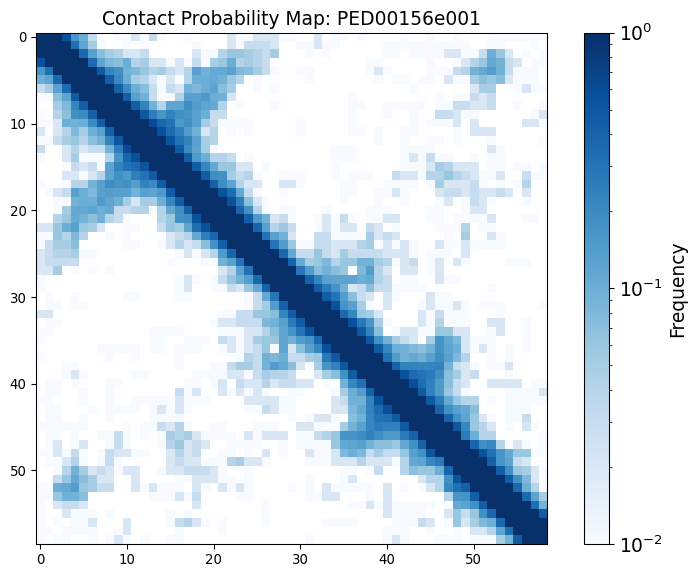

In [27]:
vis.contact_prob_map(threshold=0.8, min_sep=4, cmap_color='Blues', norm=True)

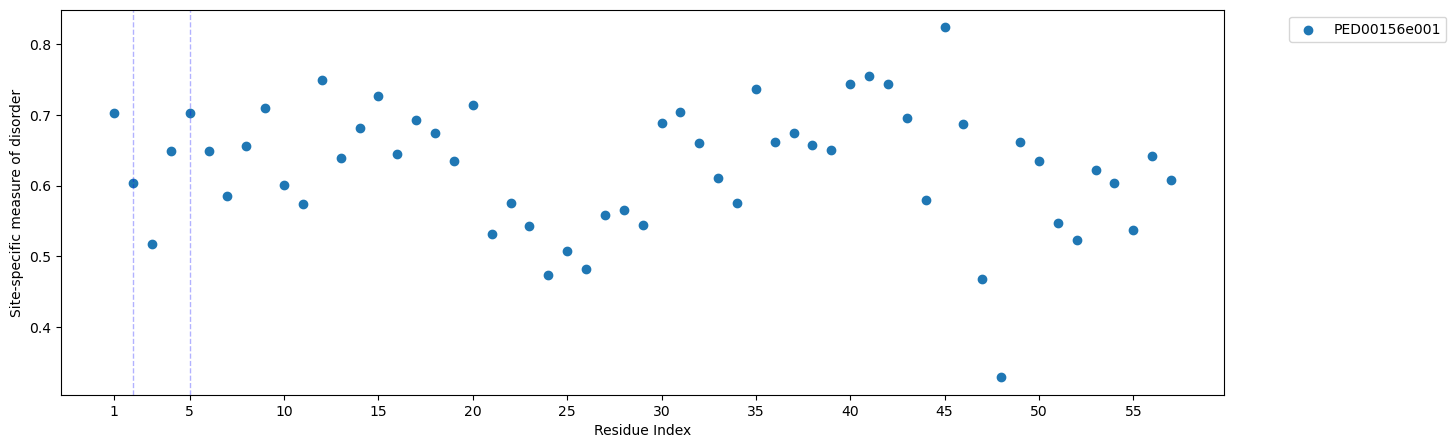

In [23]:
vis.ss_flexibility_parameter(pointer=[2,5])

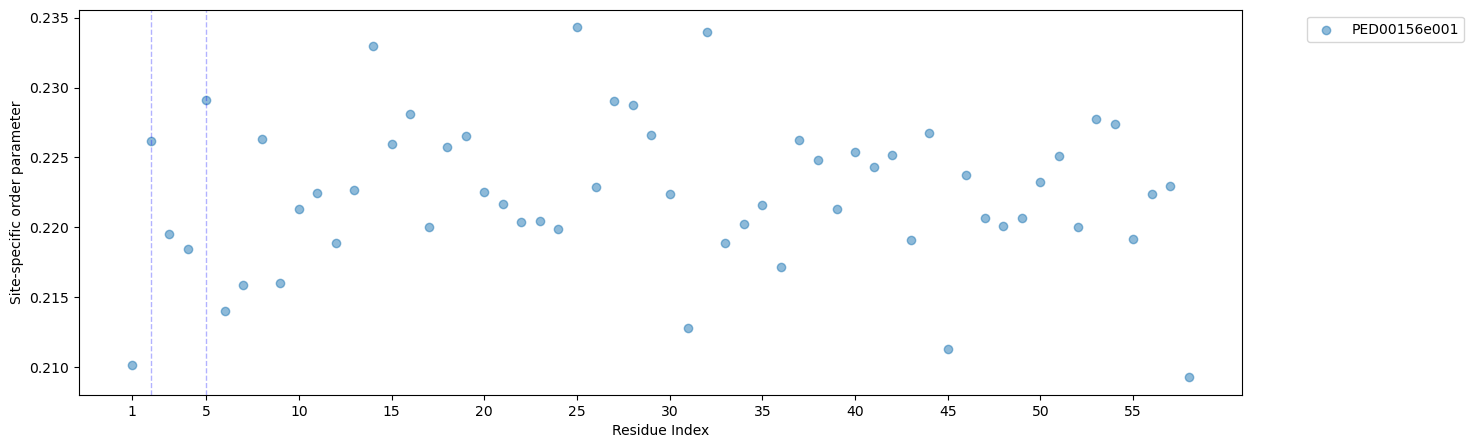

In [24]:
vis.ss_order_parameter(pointer=[5,2])

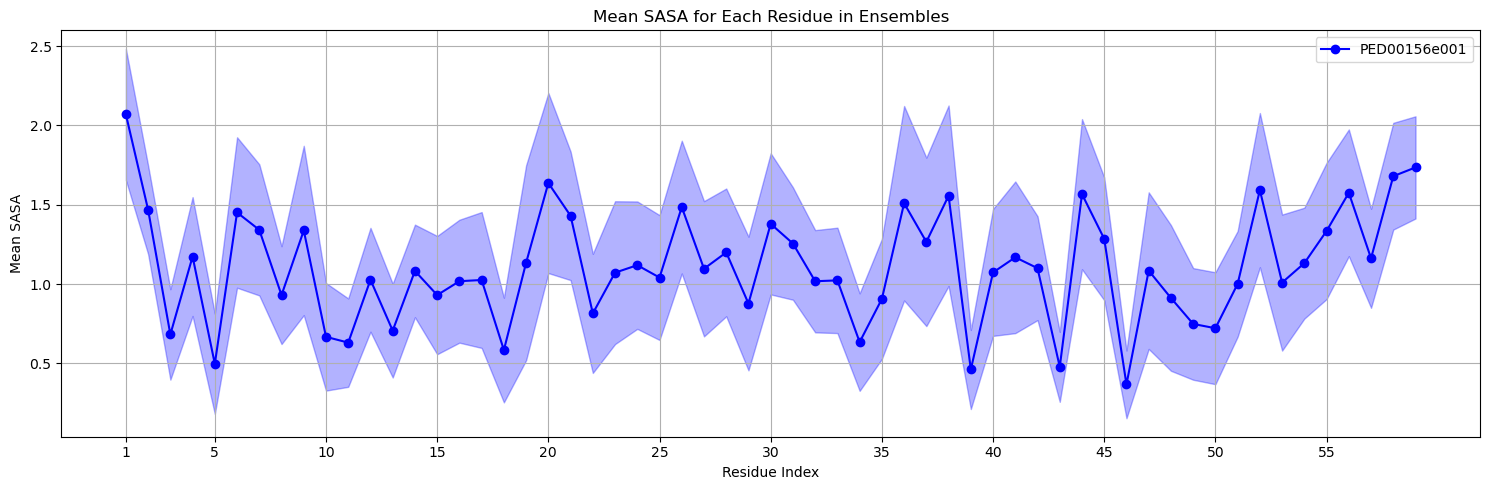

In [25]:
vis.local_sasa()

# Ensemble: PED00156e001
features: (100, 1653)
distance matrix: (59, 59)


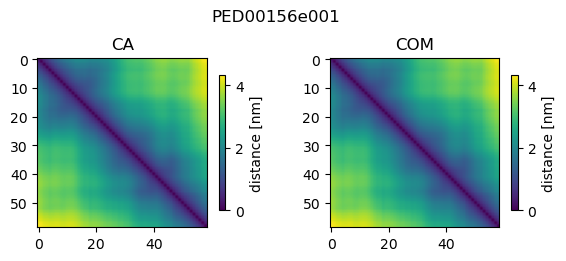

In [26]:
vis.ca_com_dist(min_sep=2)

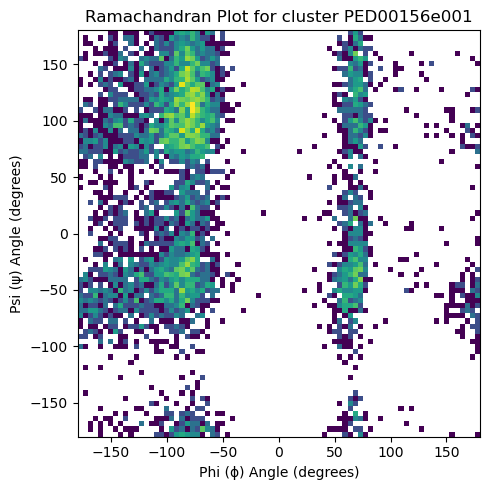

In [4]:
vis.ramachandran()

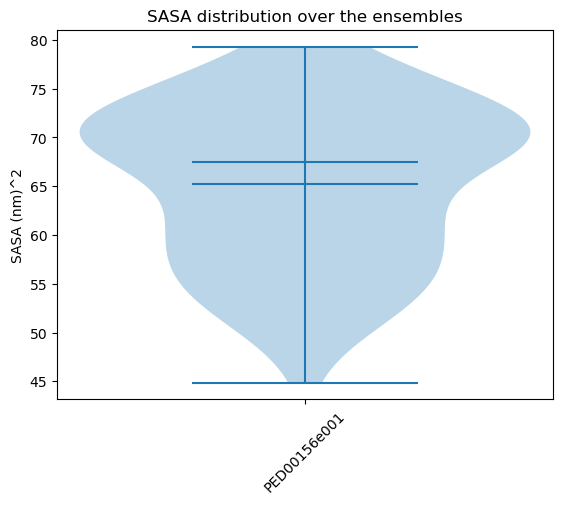

In [8]:
ax_ =vis.global_sasa()